In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as t

In [4]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [5]:
data =pd.read_csv('/content/male-female-height-and-weight/Test set.csv')

In [6]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [7]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [8]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [9]:
x= data.drop('Sex',axis=1)
y =data['Sex']

In [11]:
x.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [61]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [62]:
x.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [63]:
y.head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [64]:
y=y.astype('int')

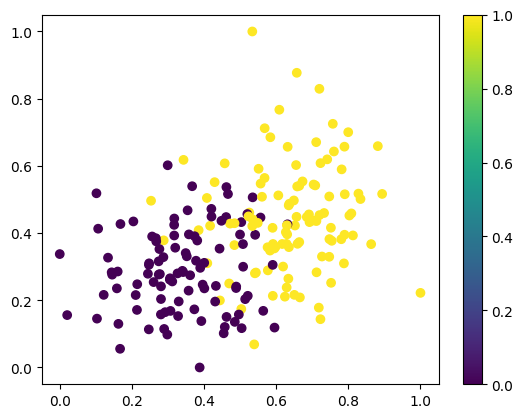

In [65]:
plt.scatter(x['Height'],x['Weight'],c=y)
plt.colorbar()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

In [68]:
data.shape

(205, 3)

###Model building

In [69]:
##create a model
model=t.keras.Sequential([
    t.keras.layers.Dense(64,activation='relu',input_shape=(2,)),
    t.keras.layers.Dense(16,activation='relu'),
    t.keras.layers.Dense(1,activation='sigmoid')
])

#compile a model
model.compile(loss=t.keras.losses.BinaryCrossentropy(),
              optimizer= t.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

#fir model
epoch_number = 20
history=model.fit(x_train,y_train,epochs=epoch_number)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5241 - loss: 0.6750
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5960 - loss: 0.6493  
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6396 - loss: 0.6303 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7507 - loss: 0.6039 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8141 - loss: 0.5823 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7882 - loss: 0.5410 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.5204  
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8233 - loss: 0.4779 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8572 - loss: 0.4349 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8187 - loss: 0.3905 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8608 - loss: 0.3175 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8609 - loss: 0.3432 
Epoch 13/20

In [70]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

In [71]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9141 - loss: 0.2700 


[0.28244084119796753, 0.9024389982223511]

In [73]:
y_pred =model.predict(x_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [74]:
y_pred[:5]

array([[0.16659476],
       [0.9800559 ],
       [0.99361324],
       [0.25167918],
       [0.97972584]], dtype=float32)

In [75]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [76]:
# Precision
precision = t.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636363744735718>

In [77]:
# Recall
recall = t.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

<Axes: >

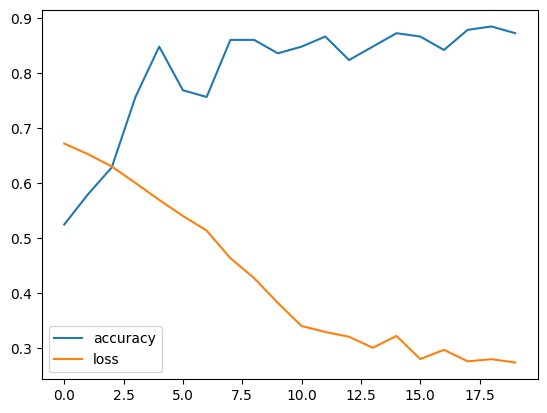

In [78]:
pd.DataFrame(history.history).plot()